## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single datase
# Display the data table for preview
df = mouse_metadata.merge(study_results, how='inner')
display(df)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_mice = pd.DataFrame({'Total Mice': [df['Mouse ID'].count()],
                          "Total Unique Mice": df['Mouse ID'].nunique()})
total_mice.set_index('Total Mice', inplace = True)
display(total_mice)


,Total Unique Mice
Total Mice,
1893,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups = df[df.duplicated(subset =['Mouse ID', 'Timepoint'], keep='first')]
display(dups)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

dups = df[df.duplicated(subset =['Mouse ID', 'Timepoint'], keep='first')]
display(dups.head(50))


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_cleaned = df[df['Mouse ID'] != 'g989']
display(df_cleaned)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_total_mice = pd.DataFrame({'Total Mice': [df_cleaned['Mouse ID'].count()],
                          "Total Unique Mice": df_cleaned['Mouse ID'].nunique()})
cleaned_total_mice.set_index('Total Mice', inplace = True)
display(cleaned_total_mice)



,Total Unique Mice
Total Mice,
1880,248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_table = pd.DataFrame({'Mean of Tumor Volume (mm3)': df_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean(),
                             'Median of Tumor Volume (mm3)': df_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].median(),
                             'Variance Of Tumor Volume(mm3)': df_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(),
                             'Standard Deviation of Tumor Volume (mm3)': df_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(),
                             'Standard Error of Tumor Volume (mm3)': df_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()})
display(summary_table)



,Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Variance Of Tumor Volume(mm3),Standard Deviation of Tumor Volume (mm3),Standard Error of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg = df_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
display(agg)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

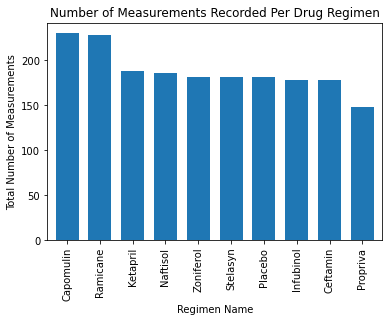

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

df_cleaned['Drug Regimen'].value_counts().plot(kind = 'bar', align='center', width=.7)
plt.xlabel('Regimen Name')
plt.ylabel('Total Number of Measurements')
plt.title('Number of Measurements Recorded Per Drug Regimen');

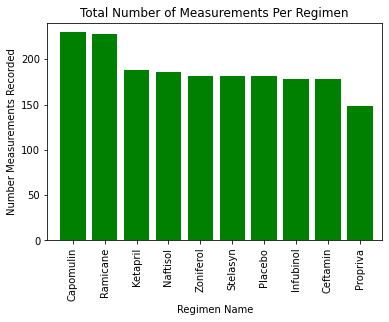

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
reg_count = df_cleaned['Drug Regimen'].value_counts()
x_axis = np.arange(len(df_cleaned['Drug Regimen'].value_counts()))
plt.bar(x_axis, reg_count,color='Green', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo",
                            "Infubinol", "Ceftamin", "Propriva"], rotation = 'vertical')
plt.xlim(-0.8, len(x_axis)-0.3)
plt.ylim(0, max(reg_count)+10)
plt.title("Total Number of Measurements Per Regimen")
plt.xlabel("Regimen Name")
plt.ylabel("Number Measurements Recorded");

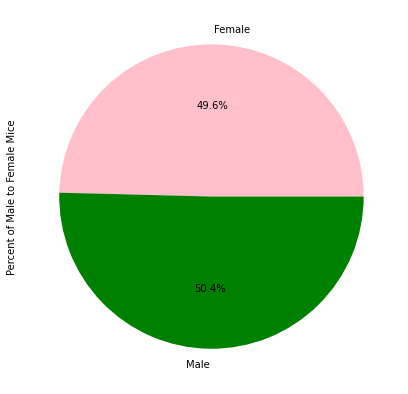

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df_cleaned.groupby('Sex')['Mouse ID'].nunique().plot(kind = 'pie',  autopct='%1.1f%%',figsize=(7,7), ylabel = 'Percent of Male to Female Mice', 
                                                     colors = ['Pink', 'Green']);



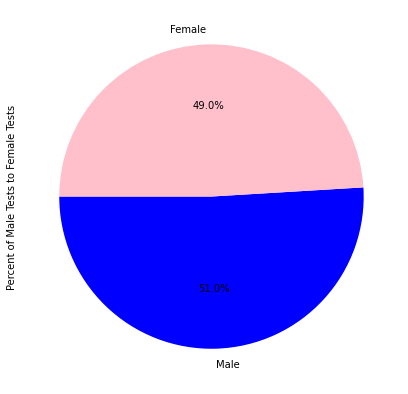

In [123]:
df_cleaned['Sex'].value_counts().plot(kind = 'pie',  autopct='%1.1f%%',figsize=(7,7), ylabel = 'Percent of Male Tests to Female Tests', 
                                      colors = ['Blue', 'Pink'], startangle =180);

In [124]:
sex = ['Male', 'Female']
sex_count = df_cleaned['Sex'].value_counts()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
